<a href="https://colab.research.google.com/github/campusplage/multidimensional-compte-rendus/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
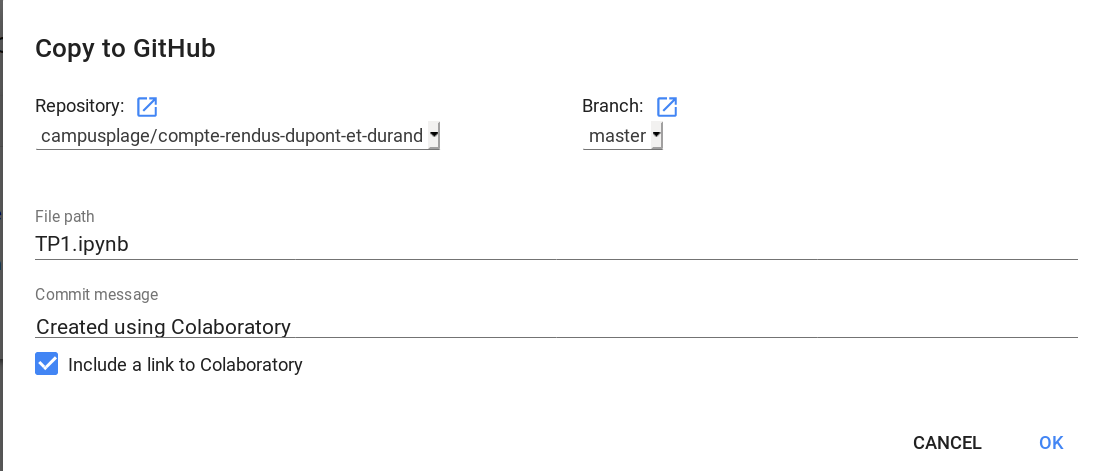

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [1]:
import pandas # Importation du package pandas 
import numpy as np # Importation du package numpy


# Importation du fichier csv avec l'encodage ISO-8859-1 comme dataframe avec l'outil pandas.
raw_data = pandas.read_csv("https://husson.github.io/img/pluie.csv",sep=";",encoding = "ISO-8859-1")
raw_data=raw_data.rename(columns={'Unnamed: 0': 'city'})
raw_data=raw_data.set_index('city')
# Appercue des données 
raw_data.head()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
city,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [2]:
# Liste des mois de l'année
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
# Niveaux de pluis
types = ['Précipitations', 'Jours de pluie']

# Création d'un index a partir de nos variables months et types, avec comme nom grandeur et mois
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])
# Création d'une liste allant de 0 à 11 puis de 12 à 24
nested_columns = list(range(12)) + list(range(13, 25))

# On Création d'DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)

# Ajout à nos nouvelle données de l'index de nos données précedente (raw_data)
data = data.set_index(raw_data.index)

# Création d'une liste contenant des noms de colonnes appartenant raw_data.
# Ajout des colonnes de data_raw séléctionné dans la liste other_column, dans data (avec leurs données)
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage des premières lignes du Dataframe
data.head()

Grandeur  Précipitations                                                    \
Mois             Janvier Février  Mars  Avril    Mai   Juin Juillet   Août   
city                                                                         
Ajaccio             78.0    69.0  51.0   39.0   43.0   23.0    10.0   15.0   
Angers              65.0    50.0  60.0   45.0   50.0   55.0    35.0   60.0   
Angoulème           79.0    68.0  64.0   62.0   70.0   58.0    53.0   66.0   
Besançon            94.0    87.0  75.0   74.0   86.0  107.0    80.0  116.0   
Biarritz           128.0   105.0  98.0  102.0  100.0   91.0    69.0  123.0   

Grandeur                     ... Jours de pluie                            \
Mois      Septembre Octobre  ...      Septembre Octobre Novembre Décembre   
city                         ...                                            
Ajaccio        43.0    81.0  ...            6.0    10.0     11.0     13.0   
Angers         55.0    65.0  ...           12.0    13.0     15.0     16.0   
Angoulème      69.0    70.0  ...           12.0    13.0     15.0     16.0   
Besançon      106.0    78.0  ...           13.0    14.0     15.0     15.0   
Biarritz      155.0   152.0  ...           14.0    15.0     16.0     17.0   

Grandeur  Température moyenne annuelle Amplitude annuelle des températures  \
Mois                                                                         
city                                                                         
Ajaccio                          14.71                                14.5   
Angers                           11.28                                14.5   
Angoulème                        12.02                                14.9   
Besançon                         10.04                                17.6   
Biarritz                         13.58                                12.3   

Grandeur  Insolation annuelle Latitude Longitude Géographie  
Mois                                                         
city                                                         
Ajaccio                2811.0    41.55      8.44        Sud  
Angers                 1899.0    47.28     -0.33      Ouest  
Angoulème              1989.0    45.39      0.09      Ouest  
Besançon               1897.0    47.15      6.02        Est  
Biarritz               1921.0    43.29     -1.34      Ouest  

[5 rows x 30 columns]

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [3]:
# Affichez seulement les précipitations mensuelles de toutes les villes (les 5 premières lignes)
data["Précipitations"].head(5)

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
city,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0


In [4]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août" (les 5 premières lignes)
data["Jours de pluie"][["Juin","Juillet","Août"]].head(5)

Mois,Juin,Juillet,Août
city,,,
Ajaccio,4.0,1.0,2.0
Angers,10.0,11.0,11.0
Angoulème,11.0,12.0,12.0
Besançon,14.0,14.0,13.0
Biarritz,14.0,13.0,13.0


In [5]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème.
tmp = data.loc["Angoulème",["Latitude",'Longitude']]
print("Latitude d'Angoulème : {} , Longitude d'Angoulème : {}".format(tmp[0],tmp[1]))

Latitude d'Angoulème : 45.39 , Longitude d'Angoulème : 0.09


> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [6]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique

data[(data.index >= "Montpellier") & (data.index <= "Paris")]["Jours de pluie"]


Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
city,,,,,,,,,,,,
Montpellier,8.0,6.0,8.0,8.0,9.0,5.0,3.0,6.0,7.0,9.0,9.0,10.0
Nancy,16.0,13.0,12.0,13.0,13.0,13.0,12.0,13.0,12.0,13.0,15.0,16.0
Nantes,18.0,14.0,14.0,11.0,13.0,11.0,12.0,12.0,14.0,15.0,16.0,18.0
Nice,9.0,7.0,8.0,9.0,8.0,5.0,2.0,4.0,7.0,9.0,9.0,9.0
Nîmes,8.0,6.0,9.0,8.0,9.0,6.0,4.0,6.0,7.0,9.0,10.0,10.0
Orléans,16.0,13.0,12.0,12.0,13.0,11.0,11.0,12.0,12.0,13.0,15.0,16.0
Paris,17.0,14.0,12.0,13.0,12.0,12.0,12.0,13.0,13.0,13.0,15.0,16.0


In [7]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 
data[(data.index >= "Montpellier") & (data.index <= "Paris")][["Précipitations","Géographie"]]

Grandeur    Précipitations                                                \
Mois               Janvier Février  Mars Avril   Mai  Juin Juillet  Août   
city                                                                       
Montpellier           56.0    59.0  69.0  46.0  47.0  41.0    20.0  52.0   
Nancy                 66.0    58.0  43.0  45.0  62.0  70.0    58.0  76.0   
Nantes                83.0    65.0  53.0  48.0  54.0  52.0    42.0  66.0   
Nice                  67.0    83.0  71.0  70.0  39.0  37.0    21.0  38.0   
Nîmes                 52.0    53.0  57.0  45.0  50.0  40.0    25.0  40.0   
Orléans               57.0    48.0  43.0  46.0  52.0  54.0    47.0  54.0   
Paris                 53.0    48.0  40.0  45.0  53.0  57.0    54.0  61.0   

Grandeur                                        Géographie  
Mois        Septembre Octobre Novembre Décembre             
city                                                        
Montpellier      78.0   125.0     70.0     73.0        Sud  
Nancy            65.0    52.0     59.0     67.0        Est  
Nantes           80.0    77.0     95.0     94.0      Ouest  
Nice             83.0   109.0    158.0     92.0        Sud  
Nîmes            75.0   100.0     83.0     60.0        Sud  
Orléans          51.0    54.0     61.0     54.0      Ouest  
Paris            54.0    50.0     58.0     51.0       Nord

In [8]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes
data.iloc[:,-3:].head(15)

Grandeur,Latitude,Longitude,Géographie
Mois,,,
city,,,
Ajaccio,41.55,8.44,Sud
Angers,47.28,-0.33,Ouest
Angoulème,45.39,0.09,Ouest
Besançon,47.15,6.02,Est
Biarritz,43.29,-1.34,Ouest
Bordeaux,44.50,-0.34,Ouest
Brest,48.24,-4.29,Ouest
Caen,49.11,-0.21,Nord


# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [9]:
# Utilisation de groupyby avec 'Grandeur' comme level
grouped_data = data.groupby(axis=1, level='Grandeur')

En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [10]:
# Utilisation d'une boucle sur les différents groupes créés pour en afficher le nom
for group in grouped_data.groups:
  print(group)

Amplitude annuelle des températures
Géographie
Insolation annuelle
Jours de pluie
Latitude
Longitude
Précipitations
Température moyenne annuelle


Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [11]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles.
gp = grouped_data.sum()[["Précipitations","Jours de pluie"]]
gp.head()

Grandeur,Précipitations,Jours de pluie
city,,
Ajaccio,653.0,95.0
Angers,690.0,154.0
Angoulème,826.0,160.0
Besançon,1088.0,169.0
Biarritz,1474.0,177.0


In [12]:
# Comparaison de la colonnes Précipitations annuelles et la colonne que nous avons créée
comp1 = (raw_data['Précipitations annuelles'] == gp['Précipitations']).all(axis=0)
# Comparaison de la colonnes Nombre annuel de jours de pluie et la colonne que nous avons créée
comp2 = (raw_data['Nombre annuel de jours de pluie'] == gp['Jours de pluie']).all(axis=0)
print("Précipitations annuelles de Raw_data et la somme de Précipitations de gp est égal  : {} ".format(comp1))
print("Nombre annuel de jours de pluie de Raw_data et la somme de Jours de pluie de gp est égal  : {} ".format(comp2))

Précipitations annuelles de Raw_data et la somme de Précipitations de gp est égal  : True 
Nombre annuel de jours de pluie de Raw_data et la somme de Jours de pluie de gp est égal  : True 


Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [13]:
# Selection des précipitation de mai jusqu'a juin
cumulP = data.loc[:,(['Précipitations'], ['Mai','Juin','Juillet','Août'])].sum(axis=1)
# Selection des jours de pluie de mai jusqu'a juin
cumulJ = data.loc[:,(['Jours de pluie'], ['Mai','Juin','Juillet','Août'])].sum(axis=1)
# Concaténation des deux sélections en un seul Dataframe
result = pandas.DataFrame([cumulP,cumulJ],index = ["Précipitations","Jours de pluie"]).transpose() 
result.head()

,Précipitations,Jours de pluie
city,,
Ajaccio,91.0,15.0
Angers,200.0,45.0
Angoulème,247.0,49.0
Besançon,389.0,55.0
Biarritz,383.0,57.0


## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [14]:
# Suppression des colonnes dont le nom est contennue dans other columns, transformation de l'index city en colonne
new_data= data.drop(other_columns,axis=1).reset_index().melt( id_vars ='city')
new_data = new_data.rename( columns ={'city': 'ville'}) # Renomage de city en ville
new_data.head()

C:\Users\theoo\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,ville,Grandeur,Mois,value
0,Ajaccio,Précipitations,Janvier,78.0
1,Angers,Précipitations,Janvier,65.0
2,Angoulème,Précipitations,Janvier,79.0
3,Besançon,Précipitations,Janvier,94.0
4,Biarritz,Précipitations,Janvier,128.0


À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [15]:
# Supression de plusieurs colonnes de data afin de créer new_data, city et Géographie sont utilisé comme colonnes
new_data= data.drop(['Température moyenne annuelle', 'Amplitude annuelle des températures',
                     'Insolation annuelle', 'Latitude', 'Longitude'],axis=1).reset_index().melt( id_vars =['city','Géographie'])
new_data = new_data.rename( columns ={'city': 'ville'}) # Renomage de city en ville
new_data.head()

,ville,Géographie,Grandeur,Mois,value
0,Ajaccio,Sud,Précipitations,Janvier,78.0
1,Angers,Ouest,Précipitations,Janvier,65.0
2,Angoulème,Ouest,Précipitations,Janvier,79.0
3,Besançon,Est,Précipitations,Janvier,94.0
4,Biarritz,Ouest,Précipitations,Janvier,128.0


Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [16]:
# précipitations moyenne par mois
df = data.loc['Total',:]= data.iloc[:,:12].mean(axis=0)
df

Grandeur        Mois     
Précipitations  Janvier      65.500000
                Février      60.411765
                Mars         56.235294
                Avril        52.529412
                Mai          59.441176
                Juin         60.794118
                Juillet      45.882353
                Août         64.558824
                Septembre    71.441176
                Octobre      73.058824
                Novembre     80.852941
                Décembre     76.882353
dtype: float64

##### 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
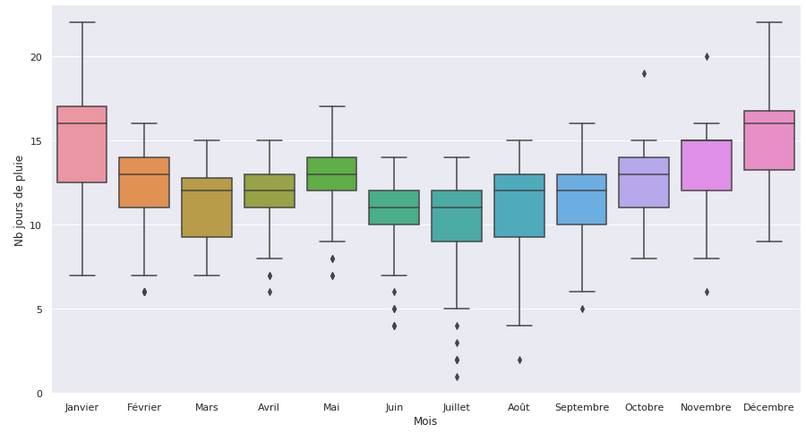

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

In [17]:
new_data.Grandeur.unique()

array(['Précipitations', 'Jours de pluie'], dtype=object)

In [18]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(16, 6)) # Selection de la taille de notre futur graphique

df = new_data[new_data["Grandeur"]=="Jours de pluie"] # Création d'un dataframe contenant seulement les jours de pluie

# Création d'un graphique affichant le mois par rapport au nombre de jours de pluie
ax = sns.boxplot(x="Mois", y="value",data=df, linewidth=2.5) 
ax.set(ylabel="Nb jours de pluie") # Ajout d'un nom à l'axe Y

[Text(0, 0.5, 'Nb jours de pluie')]

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

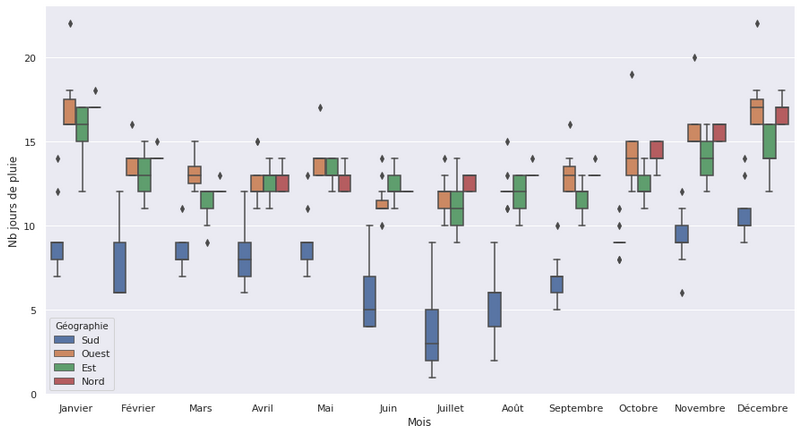

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

[Text(164.25, 0.5, 'Nb jours de pluie')]

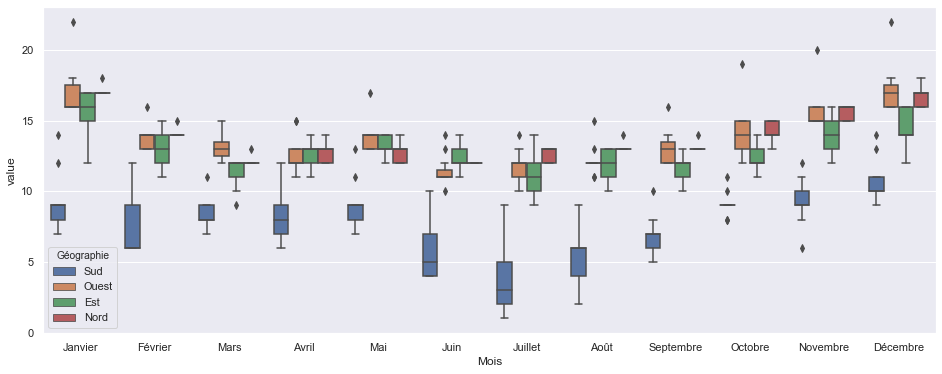

In [19]:
plt.figure(figsize=(16, 6)) # Selection de la taille de notre futur graphique

# Création du même graphique que précedent en rajoutant la dimension Géopgraphie
sns.boxplot( x='Mois',y='value' , data = df,hue='Géographie') 
ax.set(ylabel="Nb jours de pluie") # Ajout d'un nom à l'axe Y

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


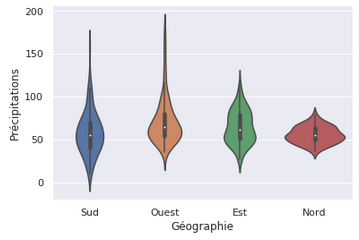

[Text(0, 0.5, 'Précipitation')]

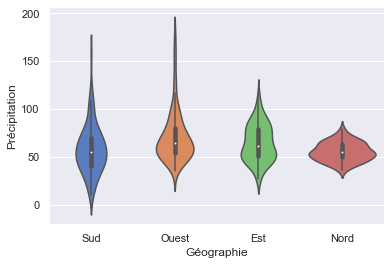

In [20]:
# Affichage de la distribution marginale des précipitations par zone géographique
df = new_data[new_data["Grandeur"]=="Précipitations"]  # Création d'un dataframe contenant seulement les Précipitations

# Création d'un graphique affichant la géographie par rapport au précipitations
ax = sns.violinplot(x="Géographie", y="value", data=df, palette="muted") 
ax.set(ylabel="Précipitation") # Ajout d'un nom à l'axe Y

## b. Affichages extras (points bonus)

> Cette section est à faire tout à la fin, quand vous aurez traité l'ensemble des TPs de ce cours.

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

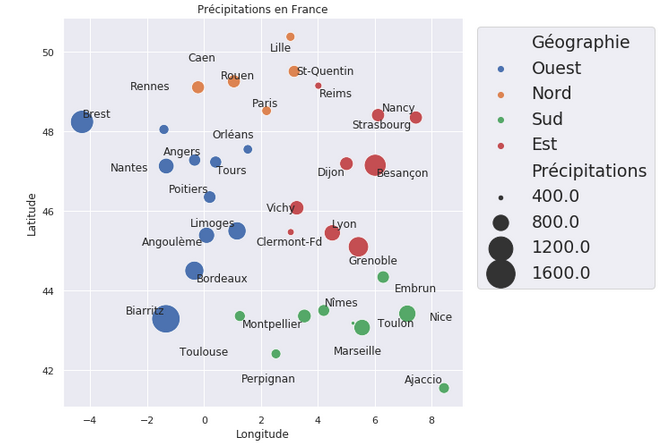

# Recréation du graphique mit en exemple

C:\Users\theoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\theoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


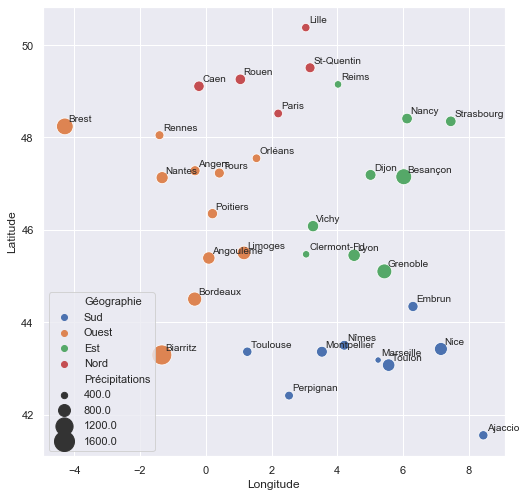

In [21]:
################# Création du dataframe contenant les informations pour notre graphe #################
df = data[["Latitude","Longitude","Géographie"]]
df["ville"] = data.index
grouped_data = data.groupby(axis=1, level='Grandeur')
gp = grouped_data.sum()["Précipitations"]
df["Précipitations"] = gp.values
######################################################################################################

fig, ax = plt.subplots()
fig.set_size_inches(8.27, 8.27)# Selection de la taille de notre futur graphique

# Création du graphique montré en exemple
sns.scatterplot(x="Longitude", y="Latitude", hue="Géographie",size = "Précipitations", sizes=(40, 400),
                data=df)

################# Ajout du nom de chaque ville à côté de son point #################
def label_point(x, y, val, ax):
    a = pandas.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.1, point['y']+0.1, str(point['val']))
label_point(df["Longitude"], df["Latitude"], df.ville, plt.gca()) 

## Nombres de jours de pluies par villes et par mois

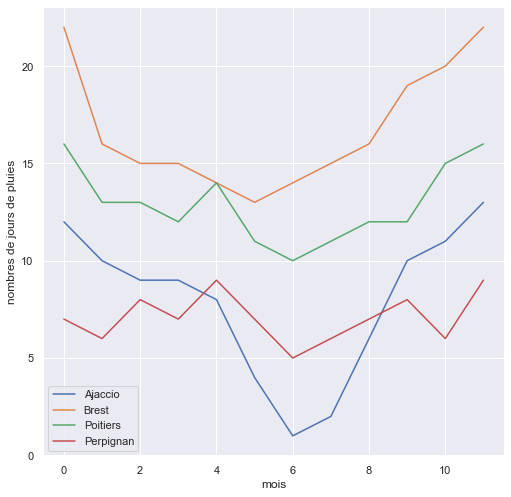

In [22]:
def jours_de_pluie(villes):
    """
    Affiche un graphique de la répartition des jours de pluies en fonction
    des mois par villes.
    Entrée : liste de villes
    Sortie : graphique basé sur chaque villes sélectionner
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(8.27, 8.27)
    for el in villes:
        row = data.loc[[el]]["Jours de pluie"].values
        plt.plot(list(range(len(row[0]))),row[0])

    plt.legend(villes)
    plt.xlabel("mois")
    plt.ylabel("nombres de jours de pluies")

rows = ['Ajaccio',"Brest","Poitiers","Perpignan"]
jours_de_pluie(rows)

## Précipitation totale par ville et région 

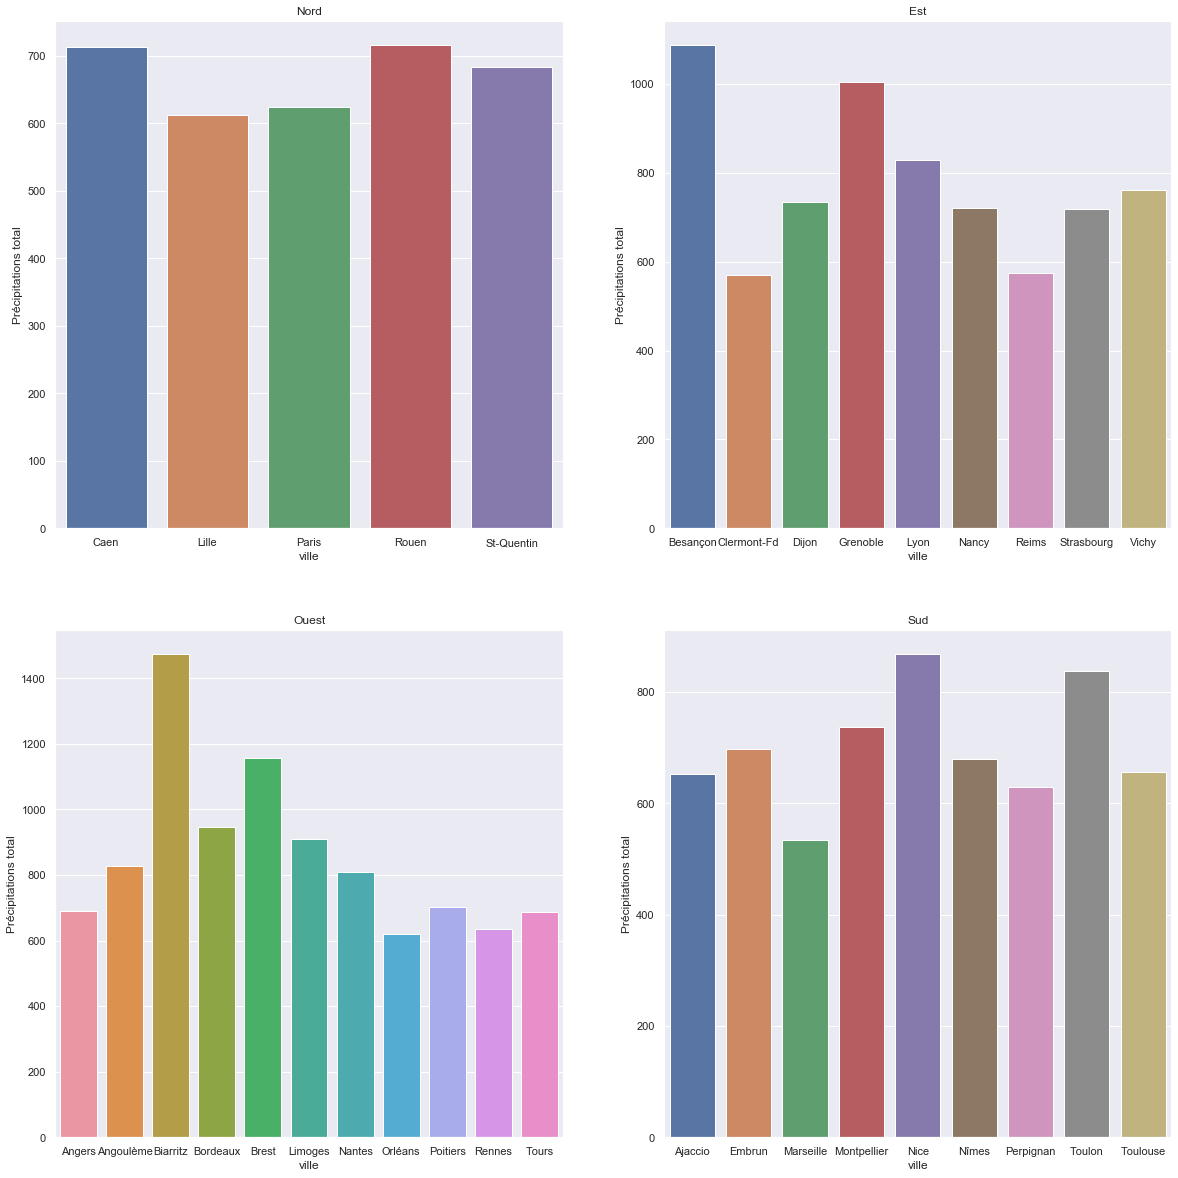

In [23]:
################# Création du dataframe contenant les informations pour notre graphe #################
grouped_data = data.groupby(axis=1, level='Grandeur')
gp = grouped_data.sum()["Précipitations"]
df = pandas.DataFrame(data = np.array(data.index),columns=["ville"])
df["Précipitations total"] = gp.values
df["Géographie"] = data.Géographie.values
######################################################################################################



fig, ax = plt.subplots(2,2) # Création d'un subplot par région
fig.set_size_inches(20, 8.27) # Selection de la taille de nos futurs graphiques

################# On affiche un graphique par région ################# 
sns.barplot(x="ville", y="Précipitations total",data=df[df["Géographie"]=="Nord"],ax = ax[0][0]).set_title("Nord")
sns.barplot(x="ville", y="Précipitations total",data=df[df["Géographie"]=="Est"] ,ax = ax[0][1]).set_title("Est")
sns.barplot(x="ville", y="Précipitations total",data=df[df["Géographie"]=="Ouest"],ax = ax[1][0]).set_title("Ouest")
sns.barplot(x="ville", y="Précipitations total",data=df[df["Géographie"]=="Sud"],ax = ax[1][1]).set_title("Sud")
####################################################################### 

plt.subplots_adjust(top=2) # Ajout d'une marge au différents graphiques 